In [33]:
# Import Libraries

import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

no_color = sns.color_palette()[0]

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [34]:
# import file
data=pd.read_csv('C:\\Users\\Shubhankar\\Downloads\\GA Work_Essia\\Data\\Data Files\\Trip Data\\2019\\All_2019_data.csv')
data.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


In [35]:
# Changing the format to datetime
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)

In [36]:
# Changing the trip_id, start_station_id, and end_station_id to object
data.bike_id = data.bike_id.astype(str)
data.trip_id = data.trip_id.astype(str)
data.start_station = data.start_station.astype(str)
data.end_station = data.end_station.astype(str)

In [37]:
# Changing the trip_r to category format
data.trip_route_category = data.trip_route_category.astype('category')
data.passholder_type = data.passholder_type.astype('category')
data.bike_type = data.bike_type.astype('category')

In [38]:
# Start time month (January - December)
data['start_time_month'] = data['start_time'].dt.strftime('%B')

In [39]:
# Start time month (1-12)
data['start_time_month_num'] = data['start_time'].dt.month.astype(int)

In [40]:
# Start time weekday
data['start_time_weekday'] = data['start_time'].dt.strftime('%a')

In [41]:
#extract date from time

data["start_day"]=data["start_time"].dt.date
data["end_day"]=data["end_time"].dt.date

In [42]:
# Week Number
data['Week_Number'] = data['start_time'].dt.week

In [43]:
# Start and end time hour
data['start_time_hour'] = data['start_time'].dt.hour
data['end_time_hour'] = data['end_time'].dt.hour

In [44]:
data['duration'] = data['duration'].astype(int)

In [45]:
#function to find missing and zero values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table


In [46]:
#checking missing and zero values in data
missing_zero_values_table(data)

Your selected dataframe has 23 columns and 1742052 Rows.
There are 4 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
end_lat,0,63510,3.6,63510,3.6,float64
end_lon,0,63510,3.6,63510,3.6,float64
start_lat,0,29022,1.7,29022,1.7,float64
start_lon,0,29022,1.7,29022,1.7,float64


In [47]:
# function to find distance
import math
from math import radians, sin, cos, acos

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371
    # this is in kilometers - will convert to US units of miles after

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * 
         math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d # this ia approx considering straight line between two stations

In [48]:
# Using the calcuated math on our columns for lat and long
data['distance_km'] = data.apply(lambda x: distance((x['start_lat'], x['start_lon']), (x['end_lat'], x['end_lon'])), axis=1)

In [49]:
# Converting the kilometers to miles
data['distance_miles'] = data['distance_km'] * 0.621371

In [50]:
data.loc[:,'User_type'] = data['passholder_type']

In [51]:
#create new column User type
data.replace({'User_type' : { 'Monthly Pass' : 'Subscriber', 'Annual Pass' : 'Subscriber', 'One Day Pass' : 'Subscriber','Walk-up':'Customer'}},inplace=True)

In [52]:
data=data[ (data['User_type'] != "Flex Pass") & (data['User_type'] != "Testing") ]

In [53]:
data.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_time_month', 'start_time_month_num',
       'start_time_weekday', 'start_day', 'end_day', 'Week_Number',
       'start_time_hour', 'end_time_hour', 'distance_km', 'distance_miles',
       'User_type'],
      dtype='object')

In [54]:
# copy dataframe
data_clean=new = data[['trip_id','duration', 'start_day', 'end_day', 'start_station',
        'end_station', 'bike_id', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_time_month', 'start_time_month_num',
       'start_time_weekday','Week_Number', 'start_time_hour', 'end_time_hour','distance_miles','passholder_type','User_type']].copy()

In [55]:
data_clean.sample(10)

,trip_id,duration,start_day,end_day,start_station,end_station,bike_id,trip_route_category,passholder_type,bike_type,start_time_month,start_time_month_num,start_time_weekday,Week_Number,start_time_hour,end_time_hour,distance_miles,passholder_type,User_type
488622,129154751,28,2019-09-15,2019-09-15,4440,4273,19662,One Way,Walk-up,electric,September,9,Sun,37,18,18,2.602673,Walk-up,Customer
1389941,130884811,6,2019-10-15,2019-10-15,3069,3005,18854,One Way,Walk-up,electric,October,10,Tue,42,9,9,0.611267,Walk-up,Customer
549556,132880614,16,2019-11-18,2019-11-18,3046,3030,6424,One Way,Monthly Pass,standard,November,11,Mon,47,16,16,0.235642,Monthly Pass,Subscriber
324147,116193055,83,2019-02-24,2019-02-24,4312,3067,6513,One Way,Walk-up,standard,February,2,Sun,8,19,20,2.771792,Walk-up,Customer
822142,131706703,8,2019-10-29,2019-10-29,3069,3035,18920,One Way,Walk-up,electric,October,10,Tue,44,9,9,0.746668,Walk-up,Customer
496305,129562571,13,2019-09-22,2019-09-22,3062,3052,12308,One Way,Annual Pass,standard,September,9,Sun,38,19,19,1.245967,Annual Pass,Subscriber
1057218,128463937,15,2019-09-03,2019-09-03,3057,3047,19135,One Way,Monthly Pass,electric,September,9,Tue,36,23,23,0.390060,Monthly Pass,Subscriber
1028502,126894140,18,2019-08-08,2019-08-08,4227,3023,16464,One Way,Monthly Pass,electric,August,8,Thu,32,7,8,2.224813,Monthly Pass,Subscriber
1564780,124024333,16,2019-06-21,2019-06-21,3067,4400,11986,One Way,Walk-up,standard,June,6,Fri,25,20,20,1.212026,Walk-up,Customer
933661,119135415,2,2019-04-09,2019-04-09,3029,3027,6140,One Way,Annual Pass,standard,April,4,Tue,15,6,6,0.088767,Annual Pass,Subscriber


## Busy Station by Day

In [56]:
#busy day in year
data_clean['start_day'].value_counts().head(5)

2019-10-06    13926
2019-08-18     8130
2019-09-18     7530
2019-08-22     7524
2019-08-21     7404
Name: start_day, dtype: int64

### The Los Angeles had Italian Festival on Oct 06,2019

In [57]:
data_clean["start_day"]=pd.to_datetime(data_clean['start_day'])

In [58]:
#filtering data for 2019-10-06
data_1day=data_clean[(data_clean['start_day'] > '2019-10-05') & (data_clean['start_day'] < '2019-10-07')]

In [59]:
data_1day['start_station'].value_counts().head()

3005    1338
3030     672
3069     558
3042     552
3082     540
Name: start_station, dtype: int64

### Busy Station on Oct 06,2019 was 3005 (Station name-7th & Flower) Address-W 7th St & Flower St, Los Angeles, CA 90017

In [60]:
#flitering data with station 3005
data_3005_start=data_1day.query('start_station ==3005')
data_3005_end=data_1day.query('end_station==3005')

In [61]:
data_3005_start["bike_Left_count"] = data_3005_start["bike_id"].count()
data_3005_end["bike_Arrive_count"] = data_3005_end["bike_id"].count()

## Busy Station By Month

In [62]:
#find count for station
data_clean["station_count"] = data_clean["start_station"].count()
data_clean["End_station_count"] = data_clean["end_station"].count()

In [63]:
#pivot table for month,station and count of trips
SMonth=pd.pivot_table(data_clean,index=["start_time_month","start_station"],values=['station_count'],aggfunc="count",margins=False)
SMonth.reset_index().head()

,start_time_month,start_station,station_count
0,April,3000,108
1,April,3005,4950
2,April,3006,2190
3,April,3007,2196
4,April,3008,1536


In [64]:
#pivot table for month,station and count of trips
EMonth=pd.pivot_table(data_clean,index=["start_time_month","end_station"],values=['End_station_count'],aggfunc="count",margins=False)
EMonth.reset_index().head()

,start_time_month,end_station,End_station_count
0,April,3000,1404
1,April,3005,5250
2,April,3006,2316
3,April,3007,1578
4,April,3008,1488


In [65]:
result=pd.concat([SMonth,EMonth],axis=1)
result
result.reset_index().head()

,level_0,level_1,station_count,End_station_count
0,April,3000,108.0,1404.0
1,April,3005,4950.0,5250.0
2,April,3006,2190.0,2316.0
3,April,3007,2196.0,1578.0
4,April,3008,1536.0,1488.0


In [66]:
#convert pivot table to dataframe
Result = pd.DataFrame(result.to_records())
Result.head()

,level_0,level_1,station_count,End_station_count
0,April,3000,108.0,1404.0
1,April,3005,4950.0,5250.0
2,April,3006,2190.0,2316.0
3,April,3007,2196.0,1578.0
4,April,3008,1536.0,1488.0


In [67]:
# get dataframe sorted by station_count in each Month 
g = Result.groupby(["level_0"]).apply(lambda x: x.sort_values(["station_count","End_station_count"], ascending = False)).reset_index(drop=True)
# select top N rows within each Month
g.columns = ['Month', 'Station','Bikes_left','Bikes_arrive']
g.groupby('Month').head(1)

,Month,Station,Bikes_left,Bikes_arrive
0,April,3030,5514.0,5250.0
131,August,3005,9678.0,9798.0
302,December,3030,6798.0,4764.0
498,February,3005,5370.0,5772.0
620,January,3005,6090.0,6318.0
718,July,3005,9246.0,9258.0
868,June,3005,7110.0,7500.0
1017,March,3005,6204.0,6396.0
1149,May,3030,6126.0,5652.0
1289,November,3005,8376.0,8844.0


### Mostly 3005 and 3030 are the busiest stations over the year.
### 3030 (Station Name- Main & 1st) Address-120 S Main St, Los Angeles, CA 90012


## Busy Station By Week

In [68]:
#pivote table for Week,station and count of trips
SWeek=pd.pivot_table(data_clean,index=["Week_Number","start_station"],values=['station_count'],aggfunc="count",margins=False)
SWeek.reset_index().head()

,Week_Number,start_station,station_count
0,1,3000,18
1,1,3005,1332
2,1,3006,378
3,1,3007,462
4,1,3008,462


In [69]:
EWeek=pd.pivot_table(data_clean,index=["Week_Number","end_station"],values=['End_station_count'],aggfunc="count",margins=False)
EWeek.reset_index().head()

,Week_Number,end_station,End_station_count
0,1,3000,522
1,1,3005,1422
2,1,3006,540
3,1,3007,336
4,1,3008,408


In [70]:
result=pd.concat([SWeek,EWeek],axis=1)
result
result.reset_index().head()

,level_0,level_1,station_count,End_station_count
0,1,3000,18.0,522.0
1,1,3005,1332.0,1422.0
2,1,3006,378.0,540.0
3,1,3007,462.0,336.0
4,1,3008,462.0,408.0


In [71]:
Week = pd.DataFrame(result.to_records())
Week.reset_index()

,index,level_0,level_1,station_count,End_station_count
0,0,1,3000,18.0,522.0
1,1,1,3005,1332.0,1422.0
2,2,1,3006,378.0,540.0
3,3,1,3007,462.0,336.0
4,4,1,3008,462.0,408.0
...,...,...,...,...,...
7750,7750,52,4482,18.0,30.0
7751,7751,52,4483,42.0,12.0
7752,7752,52,4484,6.0,6.0
7753,7753,52,4491,534.0,486.0


In [72]:
# get dataframe sorted by station_count in each Week 
g = Week.groupby(["level_0"]).apply(lambda x: x.sort_values(["station_count",'End_station_count'], ascending = False)).reset_index(drop=True)
# select top N rows within each Week
g.columns = ['Week_Number', 'Station','Bikes_left','Bikes_arrive']
g.groupby('Week_Number').head(1)

,Week_Number,Station,Bikes_left,Bikes_arrive
0,1,3030,1428.0,1062.0
198,2,3005,1482.0,1644.0
290,3,3005,978.0,978.0
383,4,3005,1620.0,1632.0
479,5,3005,1524.0,1608.0
575,6,3005,1326.0,1416.0
682,7,3005,1278.0,1506.0
784,8,4214,1902.0,1362.0
890,9,3005,1446.0,1404.0
1009,10,3005,1320.0,1356.0


### Only in Week-8 (4211-Pacific & North Venice, Address:2100 Pacific Avenue, Venice, CA)
###               Week-22(4345-Ocean Front Walk & Navy, Address:2100 Ocean Front Walk, Venice, CA)
### are new in list other than 3005 & 3030.


## Trip Duration

In [73]:
#average trip duration
data_clean.duration.mean()

31.08886236715659

In [74]:
#trip duration stats
data_clean.duration.describe()

count    1.739454e+06
mean     3.108886e+01
std      1.198796e+02
min      1.000000e+00
25%      6.000000e+00
50%      1.100000e+01
75%      2.200000e+01
max      1.440000e+03
Name: duration, dtype: float64

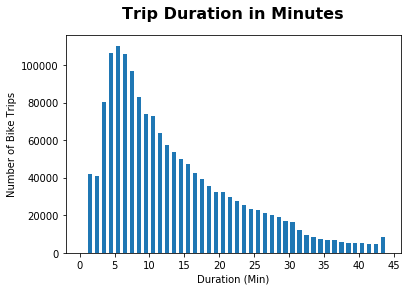

In [75]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = data_clean, x = 'duration', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Trip Duration in Minutes", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

#### The average trip is just under 31 minutes, with 75% of trips being under 22 minutes. Looking at the histogram, most rides fall in between the 4 - 12 minute range. This suggests riders are taking the bikes short distances. 

## User Type

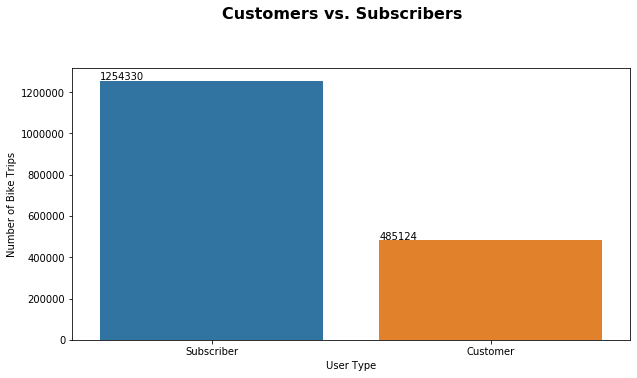

In [76]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sns.countplot(data = data_clean, x = "User_type", order = data_clean.User_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Number of Bike Trips');
plt.suptitle('Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
for p in graph.patches:
    graph.annotate(str(p.get_height()), (p.get_x() * 1, p.get_height() * 1.005))

### The majority of users are Subscribers i.e. customers who subscribe to the Yearly,monthly,Daily membership. Customers pay by trip which is $1.75/30 min per trip.

In [77]:
data_clean_cust=data_clean[(data_clean['User_type'] == 'Customer')]
data_clean_sub=data_clean[(data_clean['User_type'] == 'Subscriber')]

In [78]:
#Average trip duration customer
data_clean_cust.duration.mean()

62.38157666905781

In [79]:
data_clean_cust.duration.describe()

count    485124.000000
mean         62.381577
std         190.672012
min           1.000000
25%          11.000000
50%          21.000000
75%          41.000000
max        1440.000000
Name: duration, dtype: float64

### The average trip duration for customer is just under 62 minutes, with 75% of trips being under 41 minutes. 

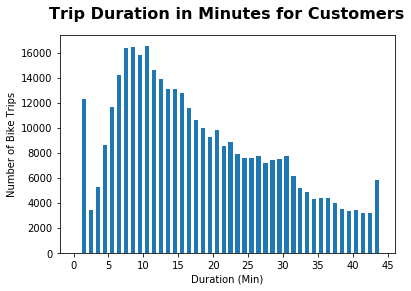

In [80]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = data_clean_cust, x = 'duration', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Trip Duration in Minutes for Customers", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

In [81]:
#Average trip duration subscriber
data_clean_sub.duration.mean()

18.986108918705604

In [82]:
data_clean_sub.duration.describe()

count    1.254330e+06
mean     1.898611e+01
std      7.309678e+01
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.700000e+01
max      1.440000e+03
Name: duration, dtype: float64

### The average trip duration for Subscriber is just under 19 minutes, with 75% of trips being under 17 minutes.¶

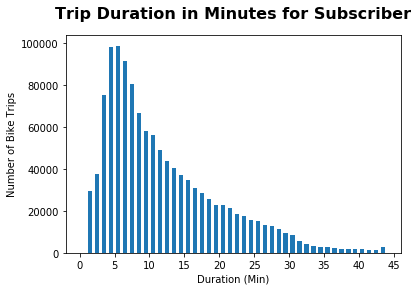

In [83]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(0, 45, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = data_clean_sub, x = 'duration', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_cleaned['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Trip Duration in Minutes for Subscriber", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Min)')
plt.xticks(ticks, labels)
plt.ylabel('Number of Bike Trips');

### There is lot of difference in average trip duration between customer and subscriber as subscriber dont need to pay for first 30 min whereas Customers pay by trip which is $1.75/30 min per trip

In [84]:
data_clean_cust['Trip_greater_30min']=['Yes' if x > 30 else "No" for x in data_clean_cust['duration']] 

In [85]:
data_clean_cust.sample(10)

,trip_id,duration,start_day,end_day,start_station,end_station,bike_id,trip_route_category,passholder_type,bike_type,...,start_time_weekday,Week_Number,start_time_hour,end_time_hour,distance_miles,passholder_type,User_type,station_count,End_station_count,Trip_greater_30min
1360403,129210319,75,2019-09-16,2019-09-16,4343,4353,16274,One Way,Walk-up,smart,...,Mon,38,15,17,0.935837,Walk-up,Customer,1739454,1739454,Yes
106396,123546179,17,2019-06-14,2019-06-14,4245,3035,12098,One Way,Walk-up,standard,...,Fri,24,17,17,2.118253,Walk-up,Customer,1739454,1739454,No
1016812,126184172,48,2019-07-26,2019-07-26,4346,4346,16198,Round Trip,Walk-up,smart,...,Fri,30,21,22,0.000000,Walk-up,Customer,1739454,1739454,Yes
637690,118543382,33,2019-03-31,2019-03-31,4131,4131,12176,Round Trip,Walk-up,standard,...,Sun,13,13,13,0.000000,Walk-up,Customer,1739454,1739454,Yes
442627,126571815,11,2019-08-02,2019-08-02,4345,4286,16178,One Way,Walk-up,smart,...,Fri,31,18,18,NaN,Walk-up,Customer,1739454,1739454,No
1586805,125532997,33,2019-07-15,2019-07-15,4136,4136,6073,Round Trip,Walk-up,standard,...,Mon,29,20,21,0.000000,Walk-up,Customer,1739454,1739454,Yes
403454,124027167,30,2019-06-21,2019-06-21,4267,4267,12346,Round Trip,Walk-up,standard,...,Fri,25,20,21,0.000000,Walk-up,Customer,1739454,1739454,No
349681,118757691,13,2019-04-03,2019-04-03,3008,3081,11971,One Way,Walk-up,standard,...,Wed,14,17,17,1.245328,Walk-up,Customer,1739454,1739454,No
1294045,125367626,28,2019-07-12,2019-07-12,3008,3035,6112,One Way,Walk-up,standard,...,Fri,28,21,22,0.160379,Walk-up,Customer,1739454,1739454,No
679,112636791,88,2019-01-02,2019-01-02,4207,4207,06460,Round Trip,Walk-up,standard,...,Wed,1,11,12,0.000000,Walk-up,Customer,1739454,1739454,Yes


In [86]:
# Customers vs Subscribers
Trip_greater_30min = data_clean_cust.query('Trip_greater_30min == "Yes"')['trip_id'].count()
Trip_less_30min = data_clean_cust.query('Trip_greater_30min == "No"')['trip_id'].count()
Trip_greater_30min_prop = Trip_greater_30min / data_clean_cust['trip_id'].count()
Trip_less_30min_prop = Trip_less_30min / data_clean_cust['trip_id'].count()

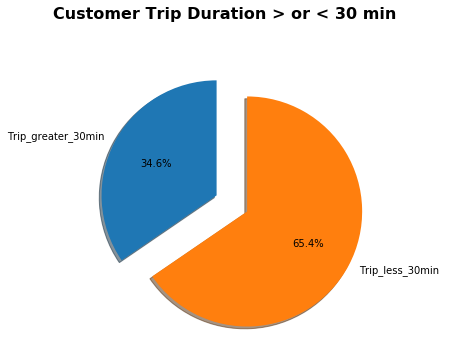

In [87]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Trip_greater_30min', 'Trip_less_30min']
size = [Trip_greater_30min_prop, Trip_less_30min_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'Black'})
plt.axis('equal')

plt.suptitle('Customer Trip Duration > or < 30 min', y=1.05, fontsize=16, fontweight='bold');

### As expected,customer preparing ride less than 30 min as they need to pay $1.75/30 min 

In [88]:
data_clean_sub['Trip_greater_30min']=['Yes' if x > 30 else "No" for x in data_clean_sub['duration']] 

In [89]:
# Customers vs Subscribers
Trip_greater_30min = data_clean_sub.query('Trip_greater_30min == "Yes"')['trip_id'].count()
Trip_less_30min = data_clean_sub.query('Trip_greater_30min == "No"')['trip_id'].count()
Trip_greater_30min_prop = Trip_greater_30min / data_clean_sub['trip_id'].count()
Trip_less_30min_prop = Trip_less_30min / data_clean_sub['trip_id'].count()

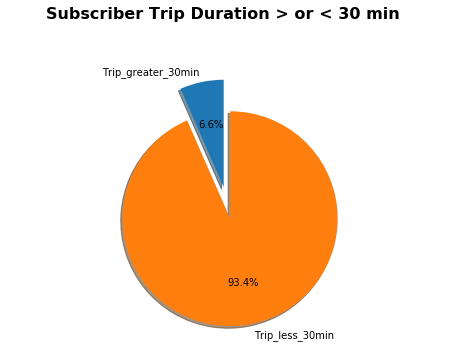

In [90]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Trip_greater_30min', 'Trip_less_30min']
size = [Trip_greater_30min_prop, Trip_less_30min_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'Black'})
plt.axis('equal')

plt.suptitle('Subscriber Trip Duration > or < 30 min', y=1.05, fontsize=16, fontweight='bold');

In [91]:
data_clean_cust.head()

,trip_id,duration,start_day,end_day,start_station,end_station,bike_id,trip_route_category,passholder_type,bike_type,...,start_time_weekday,Week_Number,start_time_hour,end_time_hour,distance_miles,passholder_type,User_type,station_count,End_station_count,Trip_greater_30min
0,112536773,7,2019-01-01,2019-01-01,3046,3051,06468,One Way,Walk-up,standard,...,Tue,1,0,0,0.619685,Walk-up,Customer,1739454,1739454,No
1,112536772,6,2019-01-01,2019-01-01,3046,3051,12311,One Way,Walk-up,standard,...,Tue,1,0,0,0.619685,Walk-up,Customer,1739454,1739454,No
2,112538689,32,2019-01-01,2019-01-01,3030,3075,05992,One Way,Walk-up,standard,...,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,Yes
3,112538688,30,2019-01-01,2019-01-01,3030,3075,05860,One Way,Walk-up,standard,...,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,No
4,112538687,28,2019-01-01,2019-01-01,3030,3075,06006,One Way,Walk-up,standard,...,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,No


In [92]:
#find revenue factor in multiple of 30 min
data_clean_cust['revenue_fact']=((data_clean_cust['duration']/30)).apply(np.ceil)

In [93]:
# find revenue based on $1.75 per 30 min
data_clean_cust['revenue']=(data_clean_cust['revenue_fact'])*1.75

In [94]:
# Revenue Statatics
data_clean_cust['revenue'].describe()

count    485124.000000
mean          4.565683
std          11.025630
min           1.750000
25%           1.750000
50%           1.750000
75%           3.500000
max          84.000000
Name: revenue, dtype: float64

#### On an average Customer Spent $ 4.5 per ride

In [95]:
# Total revenue generated from Customer
data_clean_cust['revenue'].sum()

2214922.5

### Total Revenue Generated from Customers In 2019= $ 184,5769

In [96]:
pd.set_option('display.max_columns', None)
data_clean_cust.head()

,trip_id,duration,start_day,end_day,start_station,end_station,bike_id,trip_route_category,passholder_type,bike_type,start_time_month,start_time_month_num,start_time_weekday,Week_Number,start_time_hour,end_time_hour,distance_miles,passholder_type,User_type,station_count,End_station_count,Trip_greater_30min,revenue_fact,revenue
0,112536773,7,2019-01-01,2019-01-01,3046,3051,06468,One Way,Walk-up,standard,January,1,Tue,1,0,0,0.619685,Walk-up,Customer,1739454,1739454,No,1.0,1.75
1,112536772,6,2019-01-01,2019-01-01,3046,3051,12311,One Way,Walk-up,standard,January,1,Tue,1,0,0,0.619685,Walk-up,Customer,1739454,1739454,No,1.0,1.75
2,112538689,32,2019-01-01,2019-01-01,3030,3075,05992,One Way,Walk-up,standard,January,1,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,Yes,2.0,3.50
3,112538688,30,2019-01-01,2019-01-01,3030,3075,05860,One Way,Walk-up,standard,January,1,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,No,1.0,1.75
4,112538687,28,2019-01-01,2019-01-01,3030,3075,06006,One Way,Walk-up,standard,January,1,Tue,1,0,0,0.993196,Walk-up,Customer,1739454,1739454,No,1.0,1.75


In [109]:
Month_rev=pd.pivot_table(data_clean_cust,index=["start_time_month","start_station"],values=['revenue'],aggfunc="sum",margins=False)
Month_rev.reset_index().head()

,start_time_month,start_station,revenue
0,April,3000,220.5
1,April,3005,4189.5
2,April,3006,2520.0
3,April,3007,3024.0
4,April,3008,2814.0


In [110]:
Month_rev = pd.DataFrame(Month_rev.to_records())
Month_rev.head()

,start_time_month,start_station,revenue
0,April,3000,220.5
1,April,3005,4189.5
2,April,3006,2520.0
3,April,3007,3024.0
4,April,3008,2814.0


In [116]:
# get dataframe sorted by station_count in each Month 
g = Month_rev.groupby(["start_time_month"]).apply(lambda x: x.sort_values(["revenue"], ascending = False)).reset_index(drop=True)
# select top N rows within each Month
g.groupby('start_time_month').head(1)

,start_time_month,start_station,revenue
0,April,4345,11403.0
129,August,4345,15330.0
299,December,4345,8862.0
478,February,4214,21462.0
595,January,4214,27226.5
691,July,4345,15256.5
841,June,4345,22690.5
988,March,3005,9156.0
1119,May,4345,13471.5
1253,November,4345,6195.0


In [126]:
# Revenue per day
Week_rev=pd.pivot_table(data_clean_cust,index=["start_time_weekday","start_station"],values=['revenue'],aggfunc="sum",margins=False)/52
Week_rev.reset_index().head()


,start_time_weekday,start_station,revenue
0,Fri,3000,6.865385
1,Fri,3005,244.528846
2,Fri,3006,60.173077
3,Fri,3007,47.048077
4,Fri,3008,92.278846


In [127]:
Week_rev = pd.DataFrame(Week_rev.to_records())
Week_rev.head()

,start_time_weekday,start_station,revenue
0,Fri,3000,6.865385
1,Fri,3005,244.528846
2,Fri,3006,60.173077
3,Fri,3007,47.048077
4,Fri,3008,92.278846


In [128]:
# get dataframe sorted by station_count by each day average revenue 
g = Week_rev.groupby(["start_time_weekday"]).apply(lambda x: x.sort_values(["revenue"], ascending = False)).reset_index(drop=True)
# select top N rows within each Month
g.groupby('start_time_weekday').head(1)

,start_time_weekday,start_station,revenue
0,Fri,4345,328.528846
216,Mon,4345,293.394231
425,Sat,4345,482.798077
639,Sun,4345,348.519231
858,Thu,4345,270.778846
1071,Tue,4345,317.221154
1283,Wed,4345,269.971154


In [121]:
# Revenue per week
Week_No_rev=pd.pivot_table(data_clean_cust,index=["Week_Number","start_station"],values=['revenue'],aggfunc="sum",margins=False)
Week_No_rev.reset_index().head()

,Week_Number,start_station,revenue
0,1,3005,1302.0
1,1,3006,189.0
2,1,3007,493.5
3,1,3008,535.5
4,1,3010,357.0


In [122]:
Week_No_rev = pd.DataFrame(Week_No_rev.to_records())
Week_No_rev.head()

,Week_Number,start_station,revenue
0,1,3005,1302.0
1,1,3006,189.0
2,1,3007,493.5
3,1,3008,535.5
4,1,3010,357.0


In [123]:
# get dataframe sorted by station_count in each Month 
g = Week_No_rev.groupby(["Week_Number"]).apply(lambda x: x.sort_values(["revenue"], ascending = False)).reset_index(drop=True)
# select top N rows within each Month
g.groupby('Week_Number').head(1)

,Week_Number,start_station,revenue
0,1,4214,6279.0
140,2,4214,6615.0
232,3,4214,3507.0
320,4,4214,7686.0
411,5,4214,5596.5
504,6,4214,4284.0
600,7,4214,4252.5
695,8,4214,10468.5
799,9,4331,2457.0
913,10,3031,1785.0
